<h1>Mobile Price Dataset</h1>

https://drive.google.com/file/d/1kxL9pgdacShmHZc-_Q_POg6bsvA2vPDq/view?usp=sharing

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm
import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv("Mobile price New - Mobile price New.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0.0,1,0,7.0,0.6,188,2,...,20.0,756,"2,549.00",9,7,19,0,0,1,1.0
1,1021,1.0,0.5,1.0,0,1,53.0,0.7,136,3,...,905.0,1988,"2,631.00",17,3,7,1,1,0,2.0
2,563,1.0,0.5,1.0,2,1,41.0,0.9,145,5,...,1263.0,1716,"2,603.00",11,2,9,1,1,0,2.0
3,615,1.0,2.5,0.0,0,0,10.0,0.8,131,6,...,1216.0,1786,"2,769.00",16,8,11,1,0,0,2.0
4,1821,1.0,1.2,0.0,13,1,44.0,0.6,141,2,...,1208.0,1212,"1,411.00",8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,794,1.0,0.5,1.0,0,1,2.0,0.8,106,6,...,1222.0,1890,668.00,13,4,19,1,1,0,0.0
1997,1965,1.0,2.6,1.0,0,0,39.0,0.2,187,4,...,915.0,1965,"2,032.00",11,10,16,1,1,1,2.0
1998,1911,0.0,0.9,1.0,1,1,36.0,0.7,108,8,...,868.0,1632,"3,057.00",9,1,5,1,1,0,3.0
1999,1512,0.0,0.9,0.0,4,1,46.0,0.1,145,5,...,336.0,670,869.00,18,10,19,1,1,1,0.0


# What is the shape of the dataset?


In [30]:
df.shape

(2001, 21)

# What are the data types of each column?`

In [31]:
df.dtypes

battery_power     object
blue             float64
clock_speed      float64
dual_sim         float64
fc                 int64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt         object
n_cores            int64
pc               float64
px_height        float64
px_width          object
ram               object
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
dtype: object

# Are there any missing values in the dataset?

In [32]:
df.isnull().sum()

battery_power    2
blue             1
clock_speed      3
dual_sim         1
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        1
n_cores          0
pc               1
px_height        1
px_width         2
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      2
dtype: int64

In [33]:
df.dropna(inplace=True)

In [34]:
df.shape

(1986, 21)

In [35]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [36]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0.0,1,0,7.0,0.6,188,2,...,20.0,756,"2,549.00",9,7,19,0,0,1,1.0
1,1021,1.0,0.5,1.0,0,1,53.0,0.7,136,3,...,905.0,1988,"2,631.00",17,3,7,1,1,0,2.0
2,563,1.0,0.5,1.0,2,1,41.0,0.9,145,5,...,1263.0,1716,"2,603.00",11,2,9,1,1,0,2.0
3,615,1.0,2.5,0.0,0,0,10.0,0.8,131,6,...,1216.0,1786,"2,769.00",16,8,11,1,0,0,2.0
4,1821,1.0,1.2,0.0,13,1,44.0,0.6,141,2,...,1208.0,1212,"1,411.00",8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,794,1.0,0.5,1.0,0,1,2.0,0.8,106,6,...,1222.0,1890,668.00,13,4,19,1,1,0,0.0
1997,1965,1.0,2.6,1.0,0,0,39.0,0.2,187,4,...,915.0,1965,"2,032.00",11,10,16,1,1,1,2.0
1998,1911,0.0,0.9,1.0,1,1,36.0,0.7,108,8,...,868.0,1632,"3,057.00",9,1,5,1,1,0,3.0
1999,1512,0.0,0.9,0.0,4,1,46.0,0.1,145,5,...,336.0,670,869.00,18,10,19,1,1,1,0.0


In [37]:
df['ram'] = df['ram'].str.replace(',', '')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0.0,1,0,7.0,0.6,188,2,...,20.0,756,2549.00,9,7,19,0,0,1,1.0
1,1021,1.0,0.5,1.0,0,1,53.0,0.7,136,3,...,905.0,1988,2631.00,17,3,7,1,1,0,2.0
2,563,1.0,0.5,1.0,2,1,41.0,0.9,145,5,...,1263.0,1716,2603.00,11,2,9,1,1,0,2.0
3,615,1.0,2.5,0.0,0,0,10.0,0.8,131,6,...,1216.0,1786,2769.00,16,8,11,1,0,0,2.0
4,1821,1.0,1.2,0.0,13,1,44.0,0.6,141,2,...,1208.0,1212,1411.00,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,794,1.0,0.5,1.0,0,1,2.0,0.8,106,6,...,1222.0,1890,668.00,13,4,19,1,1,0,0.0
1997,1965,1.0,2.6,1.0,0,0,39.0,0.2,187,4,...,915.0,1965,2032.00,11,10,16,1,1,1,2.0
1998,1911,0.0,0.9,1.0,1,1,36.0,0.7,108,8,...,868.0,1632,3057.00,9,1,5,1,1,0,3.0
1999,1512,0.0,0.9,0.0,4,1,46.0,0.1,145,5,...,336.0,670,869.00,18,10,19,1,1,1,0.0


In [38]:
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors = 'ignore')
df.dtypes

battery_power     object
blue             float64
clock_speed      float64
dual_sim         float64
fc                 int64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt         object
n_cores            int64
pc               float64
px_height        float64
px_width          object
ram               object
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
dtype: object

# How many unique values are there in the "mobile_wt" column?`

In [39]:
a=df["mobile_wt"]=df["mobile_wt"].nunique()
print(a)

122


# What is the average battery power of the mobile phones in the dataset?

In [40]:
for i in df.columns:
  print(i,df[i].unique(),"\n",sep="\n")

battery_power
['842' '1021' '563' ... '1139' '1467' '858']


blue
[0. 1.]


clock_speed
[2.2 0.5 2.5 1.2 1.7 2.9 2.8 1.  0.9 1.1 2.1 2.6 1.4 1.6 2.7 1.3 2.3 1.8
 3.  1.5 1.9 2.  2.4 0.6 0.8 0.7]


dual_sim
[0. 1.]


fc
[ 1  0  2 13  4  5  3  7 11 12 16  6 15  8  9 10 18 17 14 19]


four_g
[0 1]


int_memory
[ 7. 53. 41. 10. 44. 24.  9. 33. 52. 46. 23. 49. 19. 39. 13. 47. 38.  8.
 57. 51. 21.  5. 22. 60. 61.  6. 50. 34. 20. 27. 42. 40. 64. 14. 63. 43.
 16. 48. 12. 55. 36. 30. 45. 29. 58. 25.  3. 54. 15. 37. 31.  4. 18.  2.
 56. 32. 26. 35. 17. 11. 59. 28. 62.]


m_dep
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]


mobile_wt
[122]


n_cores
[2 3 5 6 8 4 7 1]


pc
[ 2.  6.  9. 14. 10.  0.  1. 18. 17. 16. 11.  7. 20. 13.  3. 19.  8. 15.
  4.  5. 12.]


px_height
[  20.  905. 1263. ...  528.  915.  483.]


px_width
['756' '1988' '1716' ... '743' '1890' '1632']


ram
['2549.00' '2631.00' '2603.00' ... '2032.00' '3057.00' '3919.00']


sc_h
[ 9 17 11 16  8 13  5 14 18 10 19 12  7  6 15]


sc_w
[ 

In [41]:
df['battery_power'] = df['battery_power'].str.replace("1993Oppo","1993")
df['battery_power'] = df['battery_power'].str.replace("Qwerty","0")

In [42]:
df['battery_power'] = df['battery_power'].astype(int)
print(df.dtypes)

battery_power      int64
blue             float64
clock_speed      float64
dual_sim         float64
fc                 int64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc               float64
px_height        float64
px_width          object
ram               object
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
dtype: object


In [43]:
df['battery_power'].mean()

1238.764853977845

# What is the distribution of battery power in the dataset?

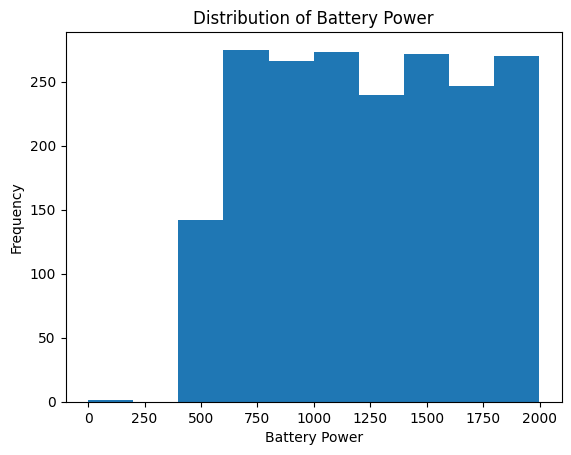

In [44]:
df['battery_power'].plot.hist(bins=10)
plt.xlabel("Battery Power")
plt.ylabel("Frequency")
plt.title("Distribution of Battery Power")
plt.show()


# How many mobile phones have a dual sim support?

In [45]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0.0,1,0,7.0,0.6,122,2,...,20.0,756,2549.00,9,7,19,0,0,1,1.0
1,1021,1.0,0.5,1.0,0,1,53.0,0.7,122,3,...,905.0,1988,2631.00,17,3,7,1,1,0,2.0
2,563,1.0,0.5,1.0,2,1,41.0,0.9,122,5,...,1263.0,1716,2603.00,11,2,9,1,1,0,2.0
3,615,1.0,2.5,0.0,0,0,10.0,0.8,122,6,...,1216.0,1786,2769.00,16,8,11,1,0,0,2.0
4,1821,1.0,1.2,0.0,13,1,44.0,0.6,122,2,...,1208.0,1212,1411.00,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,794,1.0,0.5,1.0,0,1,2.0,0.8,122,6,...,1222.0,1890,668.00,13,4,19,1,1,0,0.0
1997,1965,1.0,2.6,1.0,0,0,39.0,0.2,122,4,...,915.0,1965,2032.00,11,10,16,1,1,1,2.0
1998,1911,0.0,0.9,1.0,1,1,36.0,0.7,122,8,...,868.0,1632,3057.00,9,1,5,1,1,0,3.0
1999,1512,0.0,0.9,0.0,4,1,46.0,0.1,122,5,...,336.0,670,869.00,18,10,19,1,1,1,0.0


In [46]:

a = df['dual_sim'].value_counts()
print(f"Number of mobile phones with dual sim support: {a}")

Number of mobile phones with dual sim support: 1.0    1012
0.0     974
Name: dual_sim, dtype: int64


# What is the maximum and minimum internal memory in the dataset?

In [47]:
a=df["int_memory"].max()
b=df["int_memory"].min()

print(a,b)

64.0 2.0


# What is the distribution of internal memory in the dataset?

Text(0.5, 1.0, 'Distribution of Internal memory')

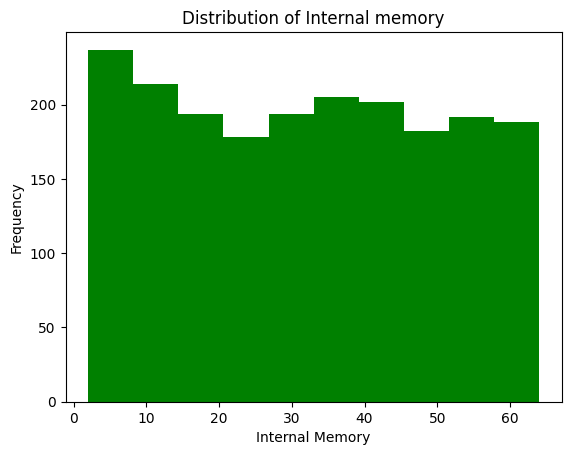

In [48]:
df["int_memory"].plot.hist(bins=10,color="green")
plt.xlabel("Internal Memory")
plt.ylabel("Frequency")
plt.title("Distribution of Internal memory")

# How many mobile phones have 4G support?

In [49]:
df_4g = df[df['four_g'] ==1]
num_4g_phones = len(df_4g)
print(f"Number of mobile phones with 4G support: {num_4g_phones}")


Number of mobile phones with 4G support: 1037


# What is the average weight of mobile phones in the dataset?

In [50]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0.0,1,0,7.0,0.6,122,2,...,20.0,756,2549.00,9,7,19,0,0,1,1.0
1,1021,1.0,0.5,1.0,0,1,53.0,0.7,122,3,...,905.0,1988,2631.00,17,3,7,1,1,0,2.0
2,563,1.0,0.5,1.0,2,1,41.0,0.9,122,5,...,1263.0,1716,2603.00,11,2,9,1,1,0,2.0
3,615,1.0,2.5,0.0,0,0,10.0,0.8,122,6,...,1216.0,1786,2769.00,16,8,11,1,0,0,2.0
4,1821,1.0,1.2,0.0,13,1,44.0,0.6,122,2,...,1208.0,1212,1411.00,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,794,1.0,0.5,1.0,0,1,2.0,0.8,122,6,...,1222.0,1890,668.00,13,4,19,1,1,0,0.0
1997,1965,1.0,2.6,1.0,0,0,39.0,0.2,122,4,...,915.0,1965,2032.00,11,10,16,1,1,1,2.0
1998,1911,0.0,0.9,1.0,1,1,36.0,0.7,122,8,...,868.0,1632,3057.00,9,1,5,1,1,0,3.0
1999,1512,0.0,0.9,0.0,4,1,46.0,0.1,122,5,...,336.0,670,869.00,18,10,19,1,1,1,0.0


In [59]:
df["mobile_wt"].mean()

122.0

# What is the maximum and minimum RAM size in the dataset?

In [60]:
df["ram"]=df["ram"].str.replace("Samsung","")
df["ram"]=df["ram"].str.replace("-","")

In [62]:
max_ram = df["ram"].max()
min_ram = df["ram"].min()

print(f"Maximum RAM size: {max_ram}")
print(f"Minimum RAM size: {min_ram}")

Maximum RAM size: 999.00
Minimum RAM size: 0


# How many mobile phones have a touch screen and 4G support?

In [64]:
a = df[
    (df["touch_screen"] == 1) & (df["four_g"] == 1)
]
b= len(a)
print(f"Number of mobile phones with touch screen and 4G support: {b}")

Number of mobile phones with touch screen and 4G support: 530


# What is the average internal memory capacity of mobile phones with 4G support and  a primary camera quality of 8 megapixels or higher?

In [66]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0.0,1,0,7.0,0.6,122,2,...,20.0,756,2549.00,9,7,19,0,0,1,1.0
1,1021,1.0,0.5,1.0,0,1,53.0,0.7,122,3,...,905.0,1988,2631.00,17,3,7,1,1,0,2.0
2,563,1.0,0.5,1.0,2,1,41.0,0.9,122,5,...,1263.0,1716,2603.00,11,2,9,1,1,0,2.0
3,615,1.0,2.5,0.0,0,0,10.0,0.8,122,6,...,1216.0,1786,2769.00,16,8,11,1,0,0,2.0
4,1821,1.0,1.2,0.0,13,1,44.0,0.6,122,2,...,1208.0,1212,1411.00,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,794,1.0,0.5,1.0,0,1,2.0,0.8,122,6,...,1222.0,1890,668.00,13,4,19,1,1,0,0.0
1997,1965,1.0,2.6,1.0,0,0,39.0,0.2,122,4,...,915.0,1965,2032.00,11,10,16,1,1,1,2.0
1998,1911,0.0,0.9,1.0,1,1,36.0,0.7,122,8,...,868.0,1632,3057.00,9,1,5,1,1,0,3.0
1999,1512,0.0,0.9,0.0,4,1,46.0,0.1,122,5,...,336.0,670,869.00,18,10,19,1,1,1,0.0


In [69]:
df_filtered = df[
    (df["four_g"] == 1) & (df["fc"] >= 8)
]

a= df_filtered["int_memory"].mean()

print(f"Average internal memory capacity: {a}")

Average internal memory capacity: 31.14090909090909


# Which mobile phone has the highest RAM size and what are its other specifications?


In [77]:
highest_ram_phone = df.loc[df['ram'] == df['ram'].max()]

# specifications
print(highest_ram_phone)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
943            1061   1.0          2.1       0.0   3       1        52.0   
1478           1150   1.0          2.7       0.0   0       0        39.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram sc_h  sc_w  \
943     0.1        122        7  ...      138.0      1330  999.00   16    12   
1478    0.4        122        8  ...      397.0       800  999.00    6     2   

      talk_time  three_g  touch_screen  wifi  price_range  
943           9        1             1     0          0.0  
1478         11        1             1     0          0.0  

[2 rows x 21 columns]


# How many mobile phones have a primary camera quality of 8 megapixels or higher and a touch screen?

In [83]:
df_filtered = df[
    (df["fc"] >= 8) & (df["touch_screen"] == 1)
]

a = len(df_filtered)
a

219

# What is the average weight of mobile phones with 4G support and a touch screen?

In [84]:

df_filtered = df[(df['four_g'] == 1) & (df['touch_screen'] == 1)]

average_weight = df_filtered['mobile_wt'].mean()

print(f"Average weight: {average_weight}")

Average weight: 122.0


# How many mobile phones have a battery power greater than 3000 mAh and a talk time greater than 20 hours?

In [85]:
df_filtered = df[
    (df["battery_power"] > 3000) & (df["talk_time"] > 20)
]

a = len(df_filtered)
a

0

# Which mobile phone has the highest primary camera quality and what are its other specifications?

In [86]:
highest_camera_phone = df[df['fc'] == df['fc'].max()]

print(highest_camera_phone)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1706           1290   1.0          1.4       1.0  19       1        35.0   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram sc_h  sc_w  \
1706    0.3        122        4  ...      405.0       742  879.00   16     2   

      talk_time  three_g  touch_screen  wifi  price_range  
1706          8        1             0     0          0.0  

[1 rows x 21 columns]


# How many mobile phones have a battery power greater than the average battery power of all mobile phones in the dataset and a primary camera quality of 10 megapixels or higher?

In [87]:
average_battery_power = df['battery_power'].mean()

df_filtered = df[
    (df['battery_power'] > average_battery_power) & (df['fc'] >= 10)
]

a = len(df_filtered)
a

152

# Is there a correlation between battery power and screen size?

In [89]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0.0,2.2,0.0,1,0,7.0,0.6,122,2,...,20.0,756,2549.00,9,7,19,0,0,1,1.0
1,1021,1.0,0.5,1.0,0,1,53.0,0.7,122,3,...,905.0,1988,2631.00,17,3,7,1,1,0,2.0
2,563,1.0,0.5,1.0,2,1,41.0,0.9,122,5,...,1263.0,1716,2603.00,11,2,9,1,1,0,2.0
3,615,1.0,2.5,0.0,0,0,10.0,0.8,122,6,...,1216.0,1786,2769.00,16,8,11,1,0,0,2.0
4,1821,1.0,1.2,0.0,13,1,44.0,0.6,122,2,...,1208.0,1212,1411.00,8,2,15,1,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,794,1.0,0.5,1.0,0,1,2.0,0.8,122,6,...,1222.0,1890,668.00,13,4,19,1,1,0,0.0
1997,1965,1.0,2.6,1.0,0,0,39.0,0.2,122,4,...,915.0,1965,2032.00,11,10,16,1,1,1,2.0
1998,1911,0.0,0.9,1.0,1,1,36.0,0.7,122,8,...,868.0,1632,3057.00,9,1,5,1,1,0,3.0
1999,1512,0.0,0.9,0.0,4,1,46.0,0.1,122,5,...,336.0,670,869.00,18,10,19,1,1,1,0.0


In [94]:
correlation1 = df['battery_power'].corr(df['sc_w'])
correlation2 = df['battery_power'].corr(df['sc_h'])

print(f"Correlation between battery power and Sreen width: {correlation1}, and screen height: {correlation2}")

Correlation between battery power and Sreen width: -0.01721874248642988, and screen height: -0.032556914102713844


# How does the number of processor cores affect the battery life of mobile phones?

In [95]:
a = df['battery_power'].corr(df['n_cores'])
print("Desired relation",a)

Desired relation -0.02896289919828511


# Is there a relationship between the weight of a mobile phone and the quality of its primary camera?

In [96]:
a = df['mobile_wt'].corr(df['fc'])
print("Desired relation",a)

Desired relation nan
